## Mean Squared Error (MSE)

#### $$RSS = \sum_{i = 1} ^ {n} \big( y ^ {(i)} - h_\theta x ^ {(i)} \big) ^ 2$$
#### $$MSE = \frac {1} {n} \cdot RSS$$
#### $$MSE = \frac {1} {n} \cdot \sum_{i = 1} ^ {n} \big( y - \hat y \big) ^ 2$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error
from matplotlib import cm

%matplotlib inline

In [34]:
# Prepare data: reshape
x = np.array([[0.2, 1.5, 2.7, 3.4, 7.1, 6.0, 1.9]]).transpose()
y = np.array([1.9, 2.0, 5.3, 3.14, 9.0, 7.6, 5.5]).reshape(7, 1)

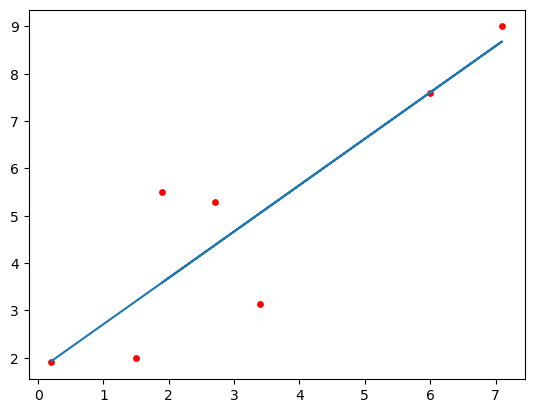

In [35]:
# Plot Linear Regression
regr = linreg()
regr.fit(x, y)

plt.scatter(x, y, color='red', s=15)
plt.plot(x, regr.predict(x))

plt.show()

## Calculating  $\hat y$
1. Calculate RSS
2. Find mean using number of total data points

- Calculate $\hat y$ as follows: $$\hat y = h_\theta (x_i) = \theta_0 + \theta_1 \cdot x$$

In [36]:
intercept = round(regr.intercept_[0], 2)
slope = round(regr.coef_[0][0], 2)
y_hat = intercept + slope * x

print(y_hat)

[[1.926]
 [3.2  ]
 [4.376]
 [5.062]
 [8.688]
 [7.61 ]
 [3.592]]


In [37]:
# Calculating MSE
# Step 1: Calculate RSS 
def RSS(n, y, y_hat):
    sum = 0
    for i in range(n):
        sum += ((y[i][0] - y_hat[i][0]) ** 2)
    return sum

# Step 2: Calculate MSE
def MSE(y, y_hat, n = y.size):
    # mse_calc = RSS(n, y, y_hat) / n
    # mse_calc = sum((y - y_hat) ** 2) / y.size
    mse_calc = np.average((y - y_hat) ** 2)
    
    return mse_calc

In [38]:
print('Manually calculated MSE:', MSE(y, y_hat))
print('Sci-Kit Learn MSE:', mean_squared_error(y, y_hat))
print('Sci-Kit Learn MSE with y_hat prediction:', mean_squared_error(y, regr.predict(x)))

Manually calculated MSE: 1.3894920000000002
Sci-Kit Learn MSE: 1.3894920000000002
Sci-Kit Learn MSE with y_hat prediction: 1.3894865727117853


## Plotting MSE data

In [39]:
# Prepare data
nr_theta = 100
th_0 = np.linspace(-1, 3, nr_theta)
th_1 = np.linspace(-1, 3, nr_theta)

# intercepts and slopes combinations possible: th_0 row-copied and th_1 column-copied
plt_t0, plt_t1 = np.meshgrid(th_0, th_1)

In [40]:
# Calculate plot cost at each point
# Make initial plot_cost with all costs 0
plt_cost = np.zeros((nr_theta, nr_theta))

# Calculate costs
for i in range(nr_theta):
    for j in range(nr_theta):
        y_hat = plt_t0[i][j] + plt_t1[i][j] * x
        plt_cost[i][j] = mean_squared_error(y, y_hat)

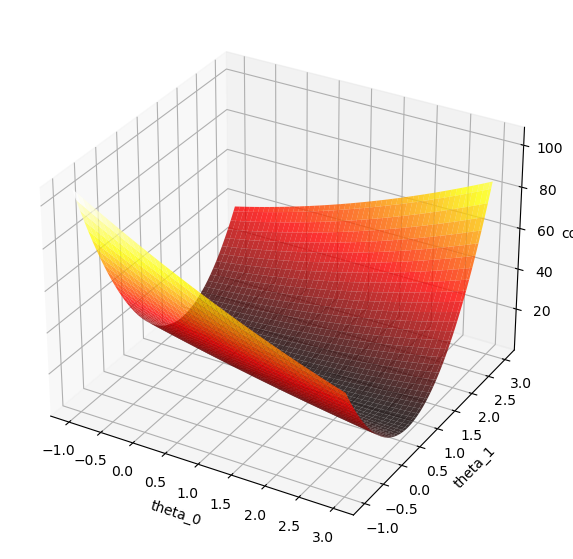

In [41]:
# Plot MSE data
fig = plt.figure(figsize=[15, 7])
plot = fig.add_subplot(111, projection='3d')

plot.set_xlabel('theta_0')
plot.set_ylabel('theta_1')
plot.set_zlabel('cost')

plot.plot_surface(plt_t0, plt_t1, plt_cost, cmap = cm.hot, alpha=0.8)
plt.show()

In [42]:
# Analysing MSE plot
# Minimum value of cost plot
min_cost = plt_cost.min()
print(min_cost)

# Minimum cost at index
min_idx = np.unravel_index(indices = plt_cost.argmin(), shape = plt_cost.shape)
print(min_idx)

# Validate min_idx 
cross_check = plt_cost[min_idx[0], min_idx[1]]
print(cross_check)

1.3898411765563286
(49, 68)
1.3898411765563286


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
### $$\frac {\partial MSE} {\partial \theta_0} = - \frac {2} {n} \sum_{i = 1} ^ {n} \big( y ^ {(i)} - \theta_0 - \theta_1 x ^ {(i)} \big) $$ 
### $$\frac {\partial MSE} {\partial \theta_1} = - \frac {2} {n} \sum_{i = 1} ^ {n} \big[ \big( y ^ {(i)} - \theta_0 - \theta_1 x ^ {(i)} \big) \cdot x ^ {(i)} \big] $$ 

In [43]:
# Calculate gradient using x, y and theta values
def grad(x, y, thetas):
    n = y.size

    # Calculate slope values using thetas
    t0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    t1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)

    return np.concatenate((t0_slope, t1_slope), axis=0)

In [44]:
# Gradient Descent and Data collection
def gradient_descent(learning_rate, initial_guess, max_itr = 500):
    # Data to be collected: format (n, 2) as theta_0, theta_1
    plot_thetas = initial_guess.reshape(1, 2)
    mse_vals = mean_squared_error(y, initial_guess[0] + initial_guess[1] * x)

    for i in range(max_itr):
        # grad takes x used for plotting axes of 3D plot
        # x = np.array([[0.2, 1.5, 2.7, 3.4, 7.1, 6.0, 1.9]]).transpose()
        initial_guess = initial_guess - learning_rate * grad(x, y, initial_guess)

        # Collect data
        plot_thetas = np.concatenate((plot_thetas, initial_guess.reshape(1, 2)), axis=0)
        mse_vals = np.append(arr=mse_vals, values=mean_squared_error(y, initial_guess[0] + initial_guess[1] * x))

    return plot_thetas, mse_vals

In [45]:
plot_thetas, mse_vals = gradient_descent(0.01, np.array([2.9, 2.9]), max_itr=5000)

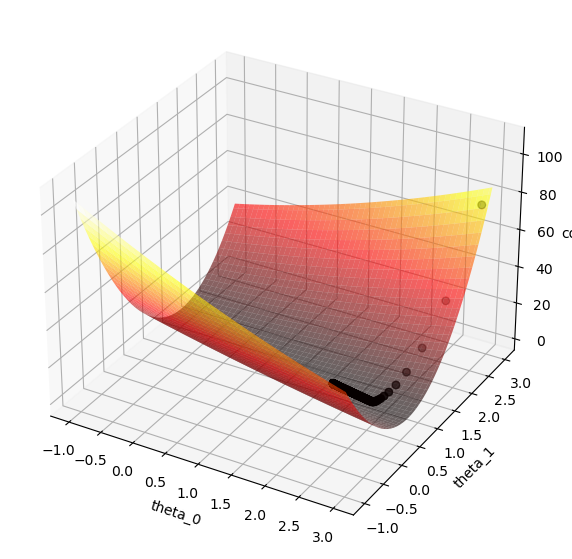

In [46]:
# Plot MSE data
fig = plt.figure(figsize=[15, 7])
plot = fig.add_subplot(111, projection='3d')

plot.set_xlabel('theta_0')
plot.set_ylabel('theta_1')
plot.set_zlabel('cost')

plot.plot_surface(plt_t0, plt_t1, plt_cost, cmap = cm.hot, alpha=0.6)
plot.scatter(plot_thetas[ : , 0], plot_thetas[ : , 1], mse_vals, s=30, color='black')
plt.show()